In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, classification_report

In [22]:
from sklearn.datasets import load_iris# Load the dataset
iris = load_iris()

# Created a DataFrame for features
X = pd.DataFrame(iris.data, columns=iris.feature_names)

# Created a Series for the target
y = pd.Series(iris.target, name='species')

# --- EDA ---
dataset = X.copy()
dataset['species'] = y

# See what the features look like
print("--- .head() ---")
print(dataset.head())

# See the data types and if there are any missing values
print("\n--- .info() ---")
dataset.info()

# See what the species are (0, 1, 2)
print("\n--- Species Value Counts ---")
print(dataset['species'].value_counts())

--- .head() ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

--- .info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species          

In [23]:
# Splitting data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (105, 4)
X_test shape: (45, 4)


In [24]:
# Create the model instance
classifier = DecisionTreeClassifier(random_state=42)

# Train (fit) the model on the training data
classifier.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


In [25]:
# 1. Make predictions on the test data
y_pred = classifier.predict(X_test)

# 2. Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)

print(f"--- Model Evaluation ---")
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(report)

--- Model Evaluation ---
Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



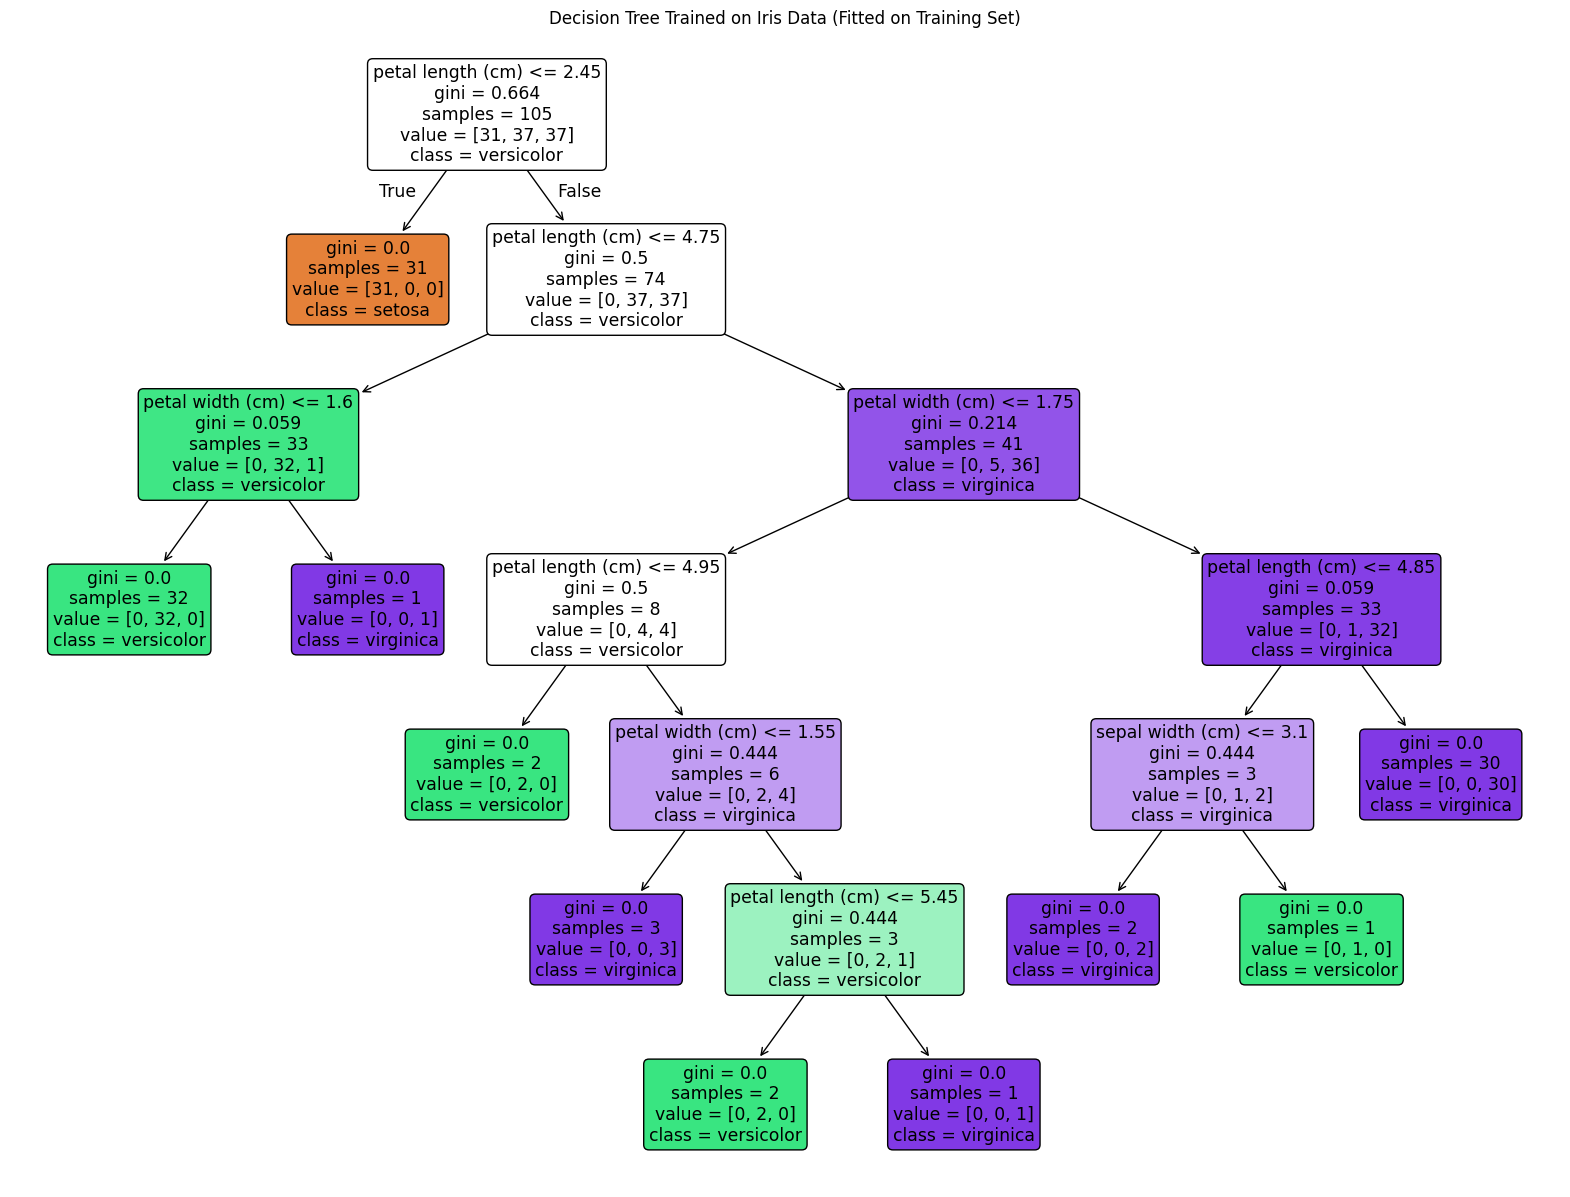

In [27]:
plt.figure(figsize=(20, 15))
tree.plot_tree(
    classifier,
    filled=True,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    rounded=True
)
plt.title("Decision Tree Trained on Iris Data (Fitted on Training Set)")
plt.show()

In [28]:
importances = pd.DataFrame(
    {'feature': X_train.columns, 'importance': classifier.feature_importances_}
).sort_values('importance', ascending=False)

print("\n--- Feature Importance ---")
print(importances)


--- Feature Importance ---
             feature  importance
2  petal length (cm)    0.893264
3   petal width (cm)    0.087626
1   sepal width (cm)    0.019110
0  sepal length (cm)    0.000000
